# Summary of Numerical Method's Codes/Formulae 

## $\textbf{Numerical integration}$
### 1. Trapezoidal rule
   
   $ I = h \biggl[\dfrac{1}{2} f(a) + \dfrac{1}{2} f(a) + \sum_{k=1}^{N - 1} f(a + kh) \biggr] $ \
   where N is the number of slices and h is the slice's height $ h = (b - a)/N $.

   $ \texttt{scipy.integrate.trapz} $ is the corresponding scipy command, which takes as argument an array of points $f(x_{i})$ and the corresponding array $x_{i}$.
Example:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

$\textit{Example:}$

In [25]:
def my_trapz(f, a, b, N): #f is the callable function
    h = (b - a)/N
 
    FS = []
    for m in range(1, N):
        fs = f(a + m*h)
        FS = np.append(FS, fs)
        
    I = h * (0.5*f(a) + 0.5*f(b) + sum(FS))
    
    return I

def growth_trapz(a, om):
    x = np.linspace(1.e-9, a, 100)
    c = (5/2)*om*(H(a, om)/h0)
    d = c*np.trapz(int(x, om), x, axis = 0)
    return d

### 2. Monte Carlo technique

   We generate $N$ uniformly random point ($\texttt{numpy.random.uniform}$) in the rectangle A. We then count the number of points below the function (k). \
   Hence the integral is $ I = \dfrac{k}{N} A $. \
   The accuracy of this method increases with increasing N.

$\textit{Example:}$

In [26]:
def MC(xmin, xmax, ymin, ymax, N):
    I = np.array([])

    xr = np.random.uniform(xmin, xmax, N)
    yr = np.random.uniform(ymin, ymax, N)
    cond = yr < func(xr) #we count only points under the function
    yr = yr[cond]
    xr = xr[cond]
    k = len(yr)
    i = 2*k/N
    I = np.append(i, I)
    
    return I

### 3. The mean value method
   
   $ I = \dfrac{(b - a)}{N} \sum_{i = 1}^{N} f(x_{i}) $

$\textit{Example:}$

In [27]:
def MVM(f, a, b, N):
    xr = np.random.uniform(a, b, N)
    fr = f(xr)
    I = ((b - a)/N)*sum(fr)
    return I

The mean value method can be used for multi-dimensional integrals and is very efficient. The integral over a volume V is:

$ I = \dfrac{V}{N} \sum_{i = 1}^{N} f(r_{i}) $

where the random points $r_{i}$ are picked uniformly from the volume V.

### 4. Importance Sampling
   Can be used when the function contains a divergence.
   
   $ I = \dfrac{1}{N} \sum_{i = 1}^{N} \dfrac{f(x_i)}{w(x_i)} \int_{a}^{b} w(x) dx $

   Choosing a function $ w(x) $ we can get rid of the divergence.

$\textit{Example:}$

In [28]:
import secrets

seed = secrets.randbits(128)
rng = np.random.default_rng(seed)

N = 100000
a = 0.6

def f(x):
    return np.exp(-a*x)

def integrand(x):
    return 1/(x**2 + np.cos(x)**2)

x = rng.random(N)
x = (-1./a)*np.log(x) # x = f^-1
fx = f(x)
integrx = integrand(x)
w = (-1/a)*(np.exp(-a*np.pi) - 1)

I = (1/N)*sum(integrx/fx)*w

### 5. $\texttt{scipy.integrate}$ functions (https://docs.scipy.org/doc/scipy/tutorial/integrate.html)

Integrating functions for a given sample:
1. $\textbf{trapz}$: trapezoid rule
2. $\textbf{cumtrapz}$: cumulative integral with trapezoidal rule
3. $\textbf{simps}$: Simpson's rule
4. $\textbf{romb}$: Romberg integration

Integrating functions for a given function object (def f(x)).
1. $\textbf{quad}$: general purpose integration
2. $\textbf{romberg}$: integrates f(x) using Romberg integration

## $\textbf{Linear algebra}$
### 1. Direct methods

1. Gauss elimination
2. LU decomposition

One can use numpy to solve a linear system A*x = b.

$ \texttt{x = np.linalg.solve(A, b)} $ (https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)

### 2. Indirect methods

$\textbf{The Gauss-Seidel method.}$ \
We basically solve the equation by iteration using the equation:

$ x_{i} = \dfrac{1}{A_{ii}} \biggl(b_{i} - \sum_{j = 1, j \neq i}^{N} A_{ij}x_{j}\biggr)$ where  i = 1, 2, ..., N

We start with a guess on x that we plug into the RHS terms. We re-calculate the LHS terms and then iterate this process until the difference between the previous and the next version of $x_{i}$ becomes "small enough".

$\textit{Example:}$

In [29]:
def GS(a, b, x, tol):
    d = np.diag(a)
    d1 = (np.diag(a))**(-1.0)

    acc = tol + 1
    while (acc > tol):
        y = np.matmul(a, x) - np.multiply(d, x)
        xi =  np.multiply(d1, b - y)
        acc = np.max(abs(x - xi))
        x = xi

    return x

## $\textbf{Root finder (non-linear equations)}$

A non-linear equation for one single variable x can be written as f(x) = 0. Thus, solving the equation is equivalent to $\textbf{finding the zeroes}$ or $\textbf{finding the roots}$ of f(x).

### 1. Relaxation method
We basically solve the equation by iterating it. \
Steps:
1. write the equation in the form $ x = f(x) $
2. start with a guess for $x$
3. iterate

Problems:
1. not always possible/easy to write the equation in the form $ x = f(x) $
2. does not always converge (re-arrange the equation again)

$\textit{Example:}$

In [30]:
def relax(f, x, tol):
    acc = tol + 1
    while acc > tol:
        x0 = f(x)
        acc = abs(x - x0)
        x = x0
    return x

### 2. Bisection method
1. write the equation in the form $ f(x) = 0 $
2. choose an interval $ x_{1}, x_{2} $
3. check that $ f(x_{1}) $ and $ f(x_{2}) $ have opposite signs
4. calculate the mid-point: $ x^{'} = 0.5* (x_{1} + x_{2}) $
5. if $ f(x^{'}) $ has the same sign as $ f(x_{1}) $ then define the new interval as $ [x^{'}, x_{2}] $. Otherwise define the new interval as $ [x_{1}, x^{'}] $
6. if $ |x_{1} - x_{2}| > \epsilon $ repeat from step 4. Otherwise calculate the mid-point once more and this is the final estimate of the root.

The number of steps that needs to take to reach the accuracy is $ N = \log_2 \dfrac{\Delta}{\epsilon} $.

$\textit{Example:}$

In [31]:
def bis(f, xmin, xmax, eps):
    while abs(xmin - xmax) > eps:
        if (f(xmin) < 0 and f(xmax) > 0) or (f(xmin) > 0 and f(xmax) < 0):
            xp = 0.5*(xmin + xmax)
            if (f(xp) < 0 and f(xmin) < 0) or (f(xp) > 0 and f(xmin) > 0):
                xmin = xp
            else:
                xmax = xp
        else:
            print('Choose another interval')
    return xp

## 3. Newton-Raphson method
1. write the equation in the form $ f(x) = 0 $
2. choose a starting guess x and the accuracy $\epsilon$ you want
3. calculate a new guess
   $ x^{'} = x - \Delta x = x - \dfrac{f(x)}{f^{'}(x)} $
4. if $|x^{'} - x| > \epsilon $, repeat from point 2. If $|x^{'} - x| \leq \epsilon $, $x^{'}$ is the result

For functions with more than one root, this method typically finds a root close to the starting value of x.

$\textit{Example:}$

In [32]:
def newton(f, derf, x, tol):
    acc = tol + 1
    while abs(acc >= tol):
        xp = x - f(x)/derf(x)
        acc = abs(xp - x)
        x = xp
    return xp

For a system of equations:

$J * \Delta x = f(x)$

This is a set of linear equations of the form Ax = b. Let us olve it using one of the methods. After we solve for $\Delta x$, the new estimate of the root is $ x^{''} = x - \Delta x$.

### 4. $\texttt{scipy.optimize}$ functions (https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)
1. $\textbf{root\_scalar}$: find a root of a scalar function, the method can be requested in the $\textit{method}$ argument\
   ($\texttt{opt.root\_scalar(func, method='bisect', bracket=[a,b])}$)
3. $\textbf{newton}$
4. $\textbf{bisect}$

## $\textbf{Random numbers}$

### 1. Random generators
- $\texttt{random}$ package: (https://docs.python.org/3/library/random.html)
  1. $\texttt{random()}$: generates floating point random numbers between 0 and 1
     To obtain a random between min and max do \
     $\texttt{a = random.random()}$ \
     $\texttt{b = a*(max - min) + min}$
  2. $\texttt{randint(min, max)}$: generates integer random numbers between min and max
- $\texttt{numpy.random}$ package: (https://numpy.org/doc/stable/reference/random/index.html#random-sampling-numpy-random)
  1. $\texttt{rand()}$: generates floating point random numbers between 0 and 1
 
The seed is the first number of the series and uniquely determines the entire series: $\texttt{random.seed(42)}$.

### 2. Generation of random numbers following different distributions.

- Inverse random sampling:
1. Take a PDF $p(y)$ of the quantity y you want to sample
2. integrate $p(y) dy$ over the range to obtain the cumulative probability distribution function (CDF): $P(y) = \int_{y_{min}}^{y} p(y^{'}) dy^{'}$
3. randomly sample the values $x = P(y)$ of the CDF between 0 and 1 with a random generator
4. invert the function $P(y)$ to get $y = P(y)^{-1}$
5. Repeat steps 4 and 5 as many times as you need to get y for N random numbers

$\textit{Example:}$ $10^5$ values sample of a random variable distributed according to $p(x) = a e^{-ax}$, with $a=0.6$.

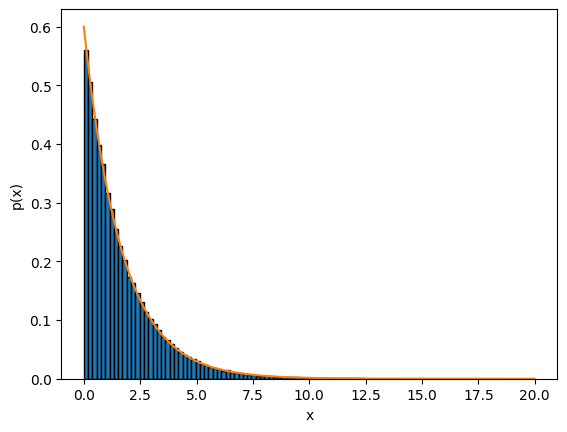

In [33]:
import secrets
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

seed = secrets.randbits(128)
rng = np.random.default_rng(seed)
N = 100000
a = 0.6

y = rng.random(N)
x = -(1/a)*np.array(np.log(y))

plt.hist(x, bins = 100, density = 'True', ec = 'black')
x2 = np.linspace(0, 20, 1000)
p = a*np.exp(-a*x2)
plt.plot(x2, p)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

## $\textbf{Fourier tranforms}$

### 1. Discrete Fourier Transform (DFT)

$c_{k} = \sum_{n=0}^{N - 1} y_{n} exp(-i \dfrac{2\pi k n}{N}) $ \
$y_{n} = \sum_{n=0}^{N - 1} c_{k} exp(-i \dfrac{2\pi k n}{N}) $ 

We can freely move back and fourth from the coefficients to the samples and vice versa WITHOUT LOSING ANY INFORMATION in our data

### 2. Fast Fourier Transform (FFT)
- $ \texttt{numpy.fft} $:
1. $\textbf{rfft}$: FFT for real values
2. $\textbf{irfft}$: inverse FFT for real values
3. $\textbf{rfft2}$: FFT for real values in 2D
4. $\textbf{irfft2}$: inverse FFT for real values
5. $\textbf{rfft}$: FFT for complex values
6. $\textbf{rfft}$: inverse FFT for complex values
7. $\textbf{rfft}$: FFT for complex values in 2D
8. $\textbf{rfft}$: inverse FFT for complex values in 2D

### 3. Physical intepretation

Fourier transfrom represents a function via a set of real or complex sinusoidal waves. Any function can be represented as a sum of waves of given frequencies and the coefficients of the Fourier transform tell us $ \textbf{how much power is associated with each frequency, i.e., how big is the contribution of each frequency to the sum} $.

- Power Spectrum
Plot of $ |c_{k}| $ versus $k$.
k is proportional to the frequency: $ \nu = k/N $.
1. Main spike: main frequency and periodicity
2. Secondary spikes: harmonics

$\textit{Example:}$ Sunspots

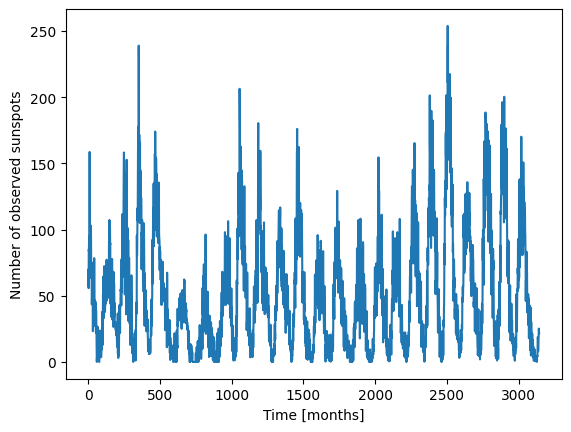

In [34]:
#Plot the number of sunspots as a function of time. Get a by eye estimate of the length of the cycle.

sun = np.genfromtxt('sunspots.txt')
time = sun[:, 0]
n = sun[:, 1]

plt.plot(time, n)
plt.xlabel('Time [months]')
plt.ylabel('Number of observed sunspots')
plt.show()

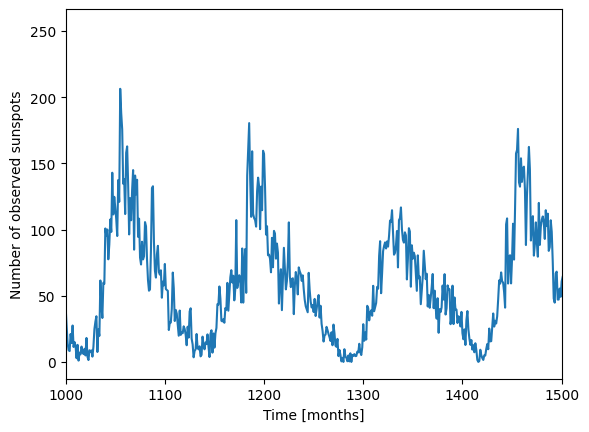

In [35]:
plt.plot(time, n)
plt.xlabel('Time [months]')
plt.ylabel('Number of observed sunspots')
plt.xlim(1000, 1500)
plt.show()

#Rough estimate of 100-150 months from the range 1300ish to 1400ish.

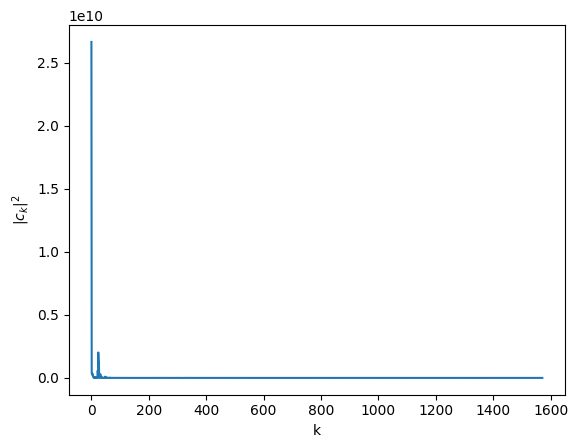

In [36]:
cn = sc.fft.rfft(n)
plt.plot(abs(cn)**2)
plt.xlabel('k')
plt.ylabel('$|c_{k}|^{2}$')
plt.show()

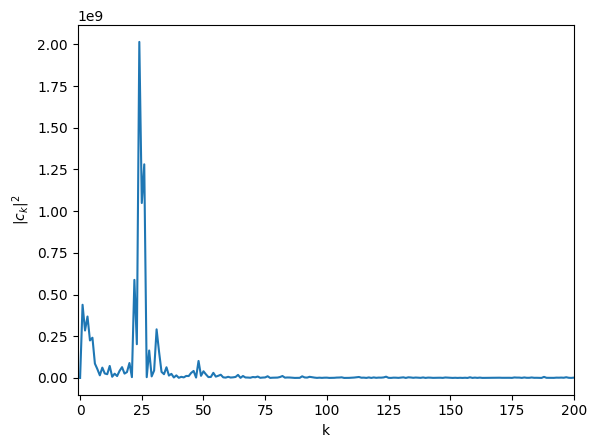

24


In [37]:
# Find the power spectrum peak for k>0. What does the $|c(0)|^2$ value represent?

cn[0] = 0
plt.plot(abs(cn)**2)
plt.xlim(-1, 200)
plt.xlabel('k')
plt.ylabel('$|c_{k}|^{2}$')
plt.show()

kmax = np.argmax(abs(cn)**2)
print(kmax)

#The $|c(0)|^2$ value represents the average value of observed sunspots (monopole).

In [38]:
# Find the period of the wave-term corresponding to the peak measured in 2.3) and compare to your estimate in 2.1)

N = len(time)
T = N / kmax
print('The cycle period is of', "{:.2f}".format(T), 'days')
print('The cycle period is of', "{:.2f}".format(T/12), 'years')

The cycle period is of 130.96 days
The cycle period is of 10.91 years


## $\textbf{Ordinary Differential Equations (ODEs)}$

### 1. Euler method:
   $ x(t+h) = x(t) + hf(x, t) $
   
   to integrate the ODE between $ t = t_0 $ and $ t = t_f $. \
   We need to choose a $h << (t_f - t_0)$ and the to repeat the equation for N steps with $ N = (t_f - t_0)/h $.

$\textit{Example:}$

In [39]:
def euler(f, x0, tf, t0, h):
    t = np.arange(t0, tf, h)
    xt = np.array([])
    for i in range(len(t)):
        x0 += h*f(x0, t[i])
        xt = np.append(xt, x0)
    return t, xt

### 2. Runge-Kutta family

Family of algorithms that solve ODEs via Taylor's expansion.
- First order: Euler method or first-order Runge-Kutta method
- Second order: midpoint or second order Runge-Kutta method
- Fourth oder

$\textit{Examples:}$

In [40]:
def rk2(f, x, tf, t0, h):
    t = np.arange(t0, tf, h)
    xt = np.array([x])
    for i in range(len(t) - 1):
        k1 = (h/2) * f(x, t[i])
        k2 = h*f(x + k1, t[i] + h/2)
        x += k2
        
        xt = np.append(xt, x)
    return t, xt

def rk4(f, x, tf, t0, h):
    t = np.arange(t0, tf, h)
    xt = np.array([x])
    for i in range(len(t) - 1):
        k1 = (h/2) * f(x, t[i])
        k2 = (h/2) * f(x + k1, t[i] + h/2)
        k3 = h*f(x + k2, t[i] + h/2)
        k4 = h*f(x + k3, t[i] + h)
        x += (1/6)*(2*k1 + 4*k2 + 2*k3 + k4)
        xt = np.append(xt, x)
    return t, xt

### 3. Systems of ODEs and second-order ODEs
Same approach as in the previous section. However, the equations must be integrated in the same timestep, simultaneously, to avoid mismatch between x and y.

$\textit{Example:}$

In [41]:
def f(X, t):
    x = X[0]
    y = X[1]
    f1 = x*y - x
    f2 = y - x*y + np.sin(t)**2
    return np.array([f1,f2],dtype='float')

def rk1_sy(f, x, tf, t0, N):
    h = (tf - t0) / N
    t = np.arange(t0, tf, h)
    xt = np.zeros((N+1, 2),dtype='float')
    xt[0,:] = x
    for i in range(len(t)):
        x += h*f(x, t[i])
        xt[i+1,:] = x
    return t, xt[:-1]

def rk2_sy(f, x, tf, t0, N):
    h = (tf - t0) / N
    t = np.arange(t0, tf, h)
    xt = np.zeros((N+1, 2),dtype='float')
    xt[0,:] = x
    for i in range(len(t)):
        k1 = (h/2) * np.array(f(x, t[i]))
        k2 = h*np.array(f(x + k1, t[i] + h / 2))
        x += k2
        
        xt[i+1,:] = x
    return t, xt[:-1]

def rk4_sy(f, x, tf, t0, N):
    h = (tf - t0) / N
    t = np.arange(t0, tf, h)
    xt = np.zeros((N+1, 2), dtype='float')
    xt[0,:] = x
    for i in range(len(t)):
        k1 = (h/2) * np.array(f(x, t[i]))
        k2 = (h/2) * np.array(f(x + k1, t[i] + h / 2))
        k3 = h*np.array(f(x + k2, t[i] + h / 2))
        k4 = h*np.array(f(x + k3, t[i] + h))
        x += (1/6)*(2*k1 + 4*k2 + 2*k3 + k4)
        
        xt[i+1,:] = x
    return t, xt[:-1]

Second-order ODEs can be re-written as a system of TWO FIRST-ORDER ODEs: 

$\dfrac{d^2x}{dt^2} = f \biggl(x, \dfrac{dx}{dt}, t\biggr)$

$
\begin{cases}
\dfrac{dx}{dt} = y \\
\dfrac{dy}{dt} = f(x, y, t)
\end{cases}
$

$\textit{Example:}$ Lane-Emden equation

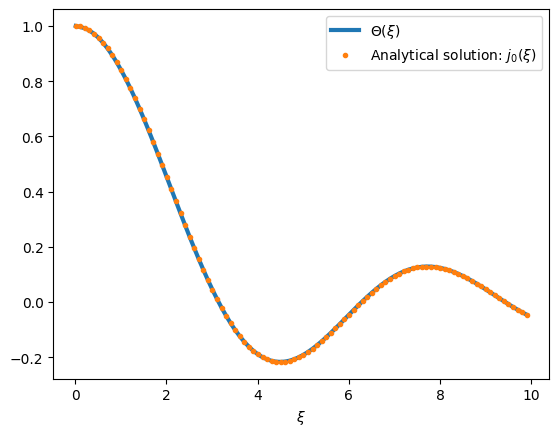

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

def func(init, xi):
    th = init[0]
    thdot = init[1]

    f1 = thdot
    f2 = -(2./xi)*thdot - th
        
    return np.array([f1, f2]) # !!!REMEMBER THAT THE OUTPUT IS A dim=2 ARRAY !!!

def rk4_solver(f, x, xi0, xif, N):
    h = (xif - xi0)/N
    xi = np.arange(xi0, xif, h)
    xt = np.array([x])
    for i in range(0, len(xi)-1):
        k1 = h*f(x, xi[i])
        k2 = h*f(x + 0.5*k1, xi[i] + 0.5*h)
        k3 = h*f(x + 0.5*k2, xi[i] + 0.5*h)
        k4 = h*f(x + k3, xi[i] + h)
        x += (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        xt = np.vstack([xt, x])

    return xi, xt

init = [1, 0]
xi, th = rk4_solver(func, init, 0.01, 10, 100)

plt.plot(xi, th[:, 0], label = '$\\Theta (\\xi)$', linewidth = '3')
j0 = np.sin(xi)/xi
plt.plot(xi, j0, '.', label = 'Analytical solution: $j_{0} (\\xi)$')

plt.xlabel('$\\xi$')
plt.legend(loc = 'best')
plt.show()

$\textit{Example:}$ Two-body problem

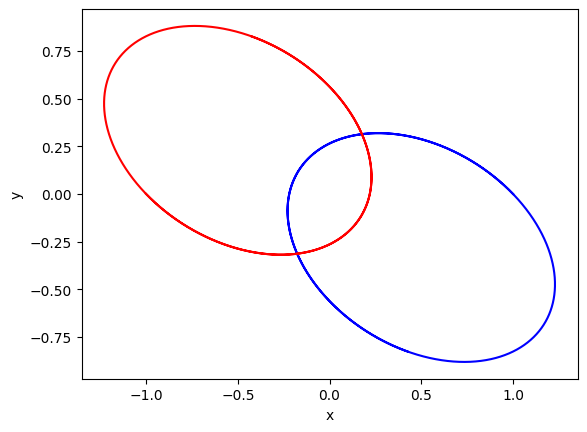

In [43]:
def midpoint_2body(x0, t0, tf, h):
    
    def acc(x):
        x1 = x[0]
        y1 = x[1]
        x2 = x[2]
        y2 = x[3]
        r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        ax1 = (x2-x1)/(r**3)  # ax1 = dvx1/dt
        ay1 = (y2-y1)/(r**3)  # ay1 = dvy1/dt
        ax2 = (x1-x2)/(r**3)  # ax2 = dvx2/dt
        ay2 = (y1-y2)/(r**3)  # ay2 = dvy2/dt
    
        return np.array([ax1,ay1,ax2,ay2])

    x1 = x0[0]
    y1 = x0[1]
    x2 = x0[2]
    y2 = x0[3]

    x = np.array([x1,y1,x2,y2])

    vx1 = x0[4]
    vy1 = x0[5]
    vx2 = x0[6]
    vy2 = x0[7]
    
    v = np.array([vx1,vy1,vx2,vy2])

    t = t0
    y = np.copy(x0)
    
    while t < tf:
        k1x = 0.5*h*v
        k1v = 0.5*h*acc(x)
        k2x = h*(v + k1v)
        k2v = h*acc(x + k1x)
        x += k2x
        v += k2v
        t += h

        ynext = np.array([x[0],x[1],x[2],x[3],v[0],v[1],v[2],v[3]])
        y = np.vstack((y,ynext))

    return y

x = [1.,0., -1.,0., -0.3,0.3,0.3,-0.3]
y = midpoint_2body(x, 0, 12, 0.001)
plt.plot(y[:, 0],y[:, 1], 'b')
plt.plot(y[:, 2], y[:, 3], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4. $\texttt{scipy.integrate}$ functions (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
- $\texttt{odeint(func, y0, t, args=())}$: Integrate a system of ordinary differential equations.

### 5. Leapfrog/Verlet method
$\textit{Example:}$ Earth orbit

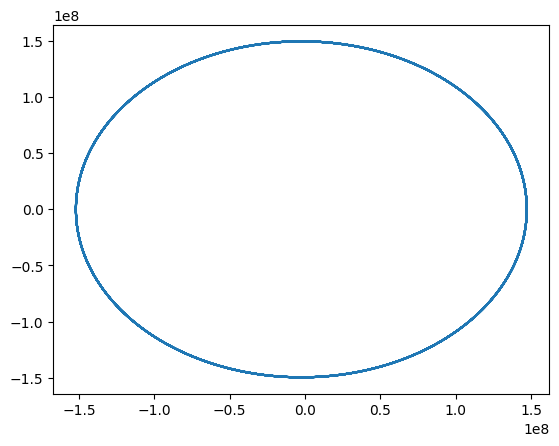

In [44]:
def velocity_verlet_1(a, in_cond):  # similar to leapfrog method
    # a = second derivative of the first function i.e. d**2(x)/dt**2
    h = in_cond['h']
    x = in_cond['x0']
    v = in_cond['v0']
    xt = [x]
    vt = [v]

    dt = np.arange(in_cond['t0'], in_cond['t1'], h)
    for t in dt:
        at = a(x)
        x += h * (v + h * at/2.)  # x(t+h)
        v += h * ( at + a(x) )/2.   # v(t+h)

        xt.append(x)
        vt.append(v)

    return dt, xt, vt

def verlet(f,specs): 

    x0 = np.array(specs['x0'])
    v0 = np.array(specs['v0'])
    t0 = specs['t0']
    t1 = specs['t1']
    h = specs['h']
    
    #Solution
    xt = np.copy(x0)
    vt = np.copy(v0)
    #Times at which the solution is computed
    times = [t0]
    t = t0
    
    # Energy
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    m = 5.9722e24   # Earth's mass
    GMm = G*M*m
    r = np.sqrt(np.sum(x0**2))
    Ep =  -GMm/r
    Ek = 0.5*m*np.sum(v0**2)
    Etot = [Ep+Ek]
    
    v1 = v0 + 0.5*h*f(x0,t0)  # v(t+h/2)
    x = np.copy(x0)
    x += h*v1                 
    
    while t < t1:
        t += h
        x += h*v1                  # x(t+h) = x(t) + h*v1
        k = h*f(x,t)               # k = h*f(x(t+h),t+h)
        v = v1 + 0.5*k             # v(t+h) = v(t+h/2) + k/2 
        v1 += k                    # v(t + 3h/2) = v(t+h/2) + k
        times.append(t)
        xt = np.vstack((xt,x))
        vt = np.vstack((vt,v))
        # Energy
        r = np.sqrt(np.sum(x**2))
        Ep = -GMm/r
        Ek = 0.5*m*np.sum(v**2)
        Etot.append(Ep+Ek)
    
    return times, xt, vt, Etot

def f(x, t):   
    
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    GM = G*M
    
    x1 = x[0] # x
    x2 = x[1] # y
    
    r = np.sqrt(x1**2. + x2**2.)
    
    f0 = -GM*x1/r**3        # dvx/dt = -GM*x/r^3
    f1 = -GM*x2/r**3        # dvy/dt = -GM*y/r^3
    
    return np.array([f0,f1])

xi = 1.471e8                  # Distance at perihelion in km
sec2years = 3.17098e-8
vy0 = -3.0287e1/sec2years     # Velocity at perihelion, km/yr

specs = {'x0': [xi, 0.], 'v0': [0., vy0], 't0':0, 't1': 10., 'h': 1e-4}

_, xv, _ , E = verlet(f, specs)

plt.plot(xv[:, 0], xv[:, 1])
plt.show()

### 6. Shooting method
We start with a guess of the initial values we do not know and then we improve our guess iteratively.

$\textit{Example:}$ Motion of a ball vertically thrown in the air with initial position x(t=0) = 0 and position x = 10, at t = 3s.

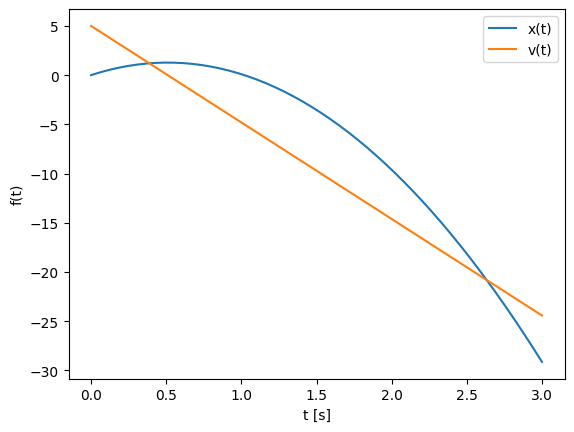

In [45]:
import scipy as sc

g = 9.81

def proj(x, t):
        f1 = x[1]
        f2 = -g
        return np.array([f1, f2])

def traj(xi, vi, ti, tf):
    t = np.linspace(ti, tf)
    init = np.array([xi, vi])

    xs = sc.integrate.odeint(proj, init, t)
    return xs, t

#First guess
xs, t = traj(0, 5, 0, 3)
plt.plot(t, xs[:, 0], label = 'x(t)')
plt.plot(t, xs[:, 1], label = 'v(t)')
plt.legend(loc = 'best')
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

18.048199999992896


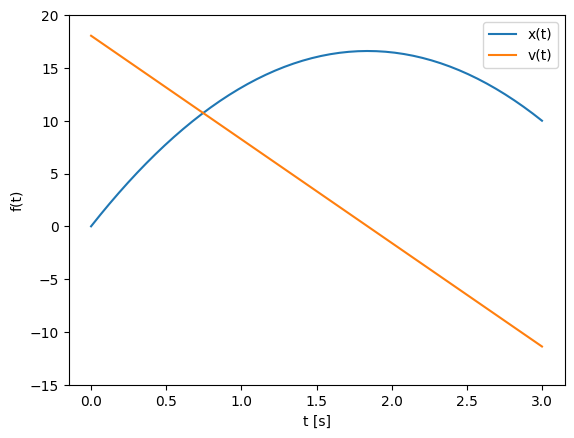

In [46]:
import scipy as sc

def shoot(x0, x1, t1, vguess, eps, acc):
    while acc > eps:     
        init = [x0, vguess]
        xs = sc.integrate.odeint(proj, init, t)
        if xs[-1, 0] != x1:
            if xs[-1, 0] < x1:
                vguess = vguess + 0.0001
            if xs[-1, 0] > x1:
                vguess = vguess - 0.0001
        else:
            pass
        
        acc = abs(xs[-1, 0] - x1)
        
    return vguess

v0 = shoot(0, 10, 3, 15, 1e-3, 1)
print(v0)

xs, t = traj(0, v0, 0, 3)
plt.plot(t, xs[:, 0], label = 'x(t)')
plt.plot(t, xs[:, 1], label = 'v(t)')
plt.legend(loc = 'best')
plt.ylim(-15, 20)
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

## $\textbf{Partial Differential Equations (PDEs)}$

### 1. Boundary-value PDE problems

We know only the boundary conditions.

STATIONARY SOLUTION that can be solved with the $\textbf{FINITE-DIFFERENCE METHODS (FDMs)}$.

- Laplace equation: $\nabla^2 \phi = 0$

Using a numerical solution of partial derivatives and dividing the problem as a grid of points separated by a, we can rewrite the Laplace equation as:\
$ \phi(x, y) = \dfrac{1}{4}[\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)] $ \
we can derive the value of $ phi(x, y) $ at any point in the grid, provided that we solve a set of linear equations. We can solve it using a simple, iterative approach like the relaxation or over-relaxation method:\
$ \phi(x, y) = \dfrac{1 + \omega}{4}[\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)] - \omega\phi(x, y)$

$\textit{Example:}$ Empty 2D box with conducting walls

0.0009990142025972295 2963


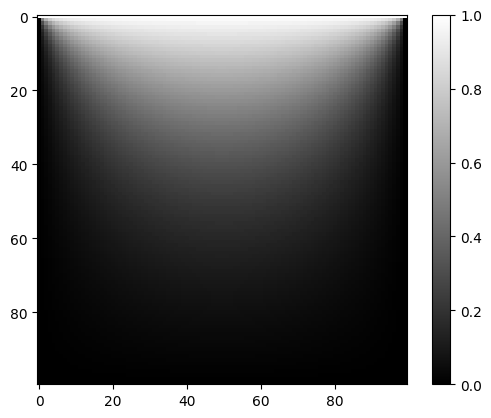

In [47]:
import numpy as np
import matplotlib.pyplot as plt

M=100
phi=np.zeros([M,M],float)
phiold=np.ones([M,M],float)

phi[0,:]=1.0
#phi[1:M,0]=phi[1:M,M-1]=phi[M-1,:]=0.0

d = 1.e-3
acc = 10.

k = 0
while (acc > d):
    for i in range(1, M-1):
        for j in range(1, M - 1):
            phi[i][j]=0.25*(phi[i+1][j]+phi[i-1][j]+phi[i][j+1]+phi[i][j-1])
    acc = np.linalg.norm(phi-phiold)
    k += 1
    phiold = np.copy(phi)

print(acc, k)

plt.imshow(phi)
plt.gray()
plt.colorbar()
plt.show()

### 2. Initial-value PDE problems
We know the initial conditions but the PDE evolves with time. It can be solved with FDMs but requires one more trick.

- One dimensional DIFFUSION EQUATION: $ \dfrac{\partial\phi}{\partial t} = D\dfrac{\partial^{2}\phi}{\partial t^2} $

We can solve this with the $ \textbf{forward-time centered-space (FTCS) method for initial-value PDEs} $.
- similar approach of FDMs: grid of $M$ points with spatial step $a$
- using the Euler method ($h$: temporal step)\
  $ \phi(x, t+h) = \phi(x, t) + \dfrac{hD}{a^2}[\phi(x+a, t) + \phi(x-a, t) - 2\phi(x, t)] $

$\textit{Example:}$ Container with water

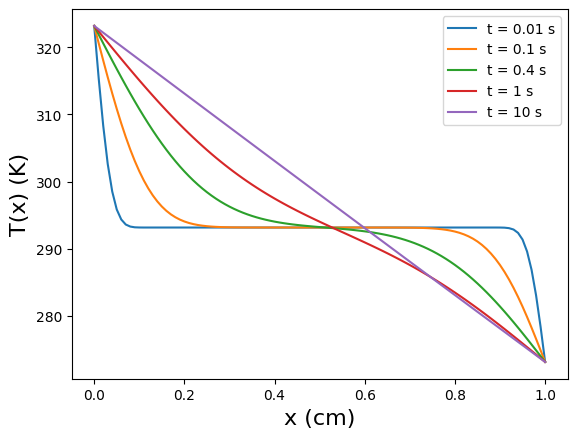

In [48]:
import numpy as np

# Solving diffusion equation with FTCS
def FTCS(T0,D,a,times,tol):
    # Time step
    h = times[1] - times[0]
    N = len(T0)
    temperature = np.zeros( (len(times),N) )
    # Initial conditions
    temperature[0,:] = np.copy(T0)
    # Boundary conditions
    temp = np.zeros(len(T0))
    temp[0] = T0[0]
    temp[N-1] = T0[N-1]
    # Integrating equation using FTCS
    for i in range(1,len(times)):
        temp[1:N-1] = temperature[i-1,1:N-1] + h*(D/(a**2))*(temperature[i-1,2:N] + temperature[i-1,0:N-2] - 
                                                             2*temperature[i-1,1:N-1])
        temperature[i,:] = np.copy(temp[:])
    
    return temperature

# Diffusion coefficients
D = 4.25*1e-6
# Grid
N = 101
a = 1e-4
# Initial and boundary conditions
T0 = np.zeros(N)
T0[0] = 323.16
T0[N-1] = 273.16
T0[1:N-1] = 293.16
# Times at which the solution is computed (from 0 to 10 sec, with 1 millisecond step)
times = np.arange(0.,10.001,1e-3)

Tx = FTCS(T0,D,a,times,1.e-4)

import matplotlib.pyplot as plt

x = np.arange(0,1.01,0.01)
plt.plot(x,Tx[10,:],label='t = 0.01 s')
plt.plot(x,Tx[100,:],label='t = 0.1 s')
plt.plot(x,Tx[400,:],label='t = 0.4 s')
plt.plot(x,Tx[1000,:],label='t = 1 s')
plt.plot(x,Tx[10000,:],label='t = 10 s')
plt.legend()
plt.xlabel('x (cm)',size = 16)
plt.ylabel('T(x) (K)',size= 16)
plt.show()